In [1006]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")  
database = pd.read_excel('/Users/haritharash/Desktop/warwick/class/Foundation_Data_Analytics/project/online_retail_II.xlsx',sheet_name='Year 2010-2011' )

# summary of uncleaned dataset
database.agg(['nunique','count','size'])

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
nunique,25900,4070,4223,722,23260,1630,4372,38
count,541910,541910,540456,541910,541910,541910,406830,541910
size,541910,541910,541910,541910,541910,541910,541910,541910


In [1007]:
#data cleaning process
# total dataset
print('Total uncleaned dataset ' ,len(database))
#remove duplicates data
database = database.drop_duplicates()
print('remove duplicate',database.shape)

#remove cancel orders in the dataset
database = database[~database['Invoice'].str.startswith('C',na=False)]
database = database[~database['Quantity'] < 0]
print('remove cancel order',database.shape)

print(database.describe())
#remove outliers

database = database[~(database['Price'] > 10000) ]
database = database[~(database['Quantity'] > 8000)]
database.agg(['nunique','count','size'])


Total uncleaned dataset  541910
remove duplicate (536642, 8)
remove cancel order (526055, 8)
            Quantity          Price    Customer ID
count  526055.000000  526055.000000  392733.000000
mean       10.730855       3.871774   15287.728182
std       157.591688      42.016525    1713.570644
min         1.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13955.000000
50%         4.000000       2.080000   15150.000000
75%        11.000000       4.130000   16791.000000
max     80995.000000   13541.330000   18287.000000


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
nunique,20723,3940,4076,390,19048,1291,4337,38
count,526050,526050,525458,526050,526050,526050,392730,526050
size,526050,526050,526050,526050,526050,526050,526050,526050


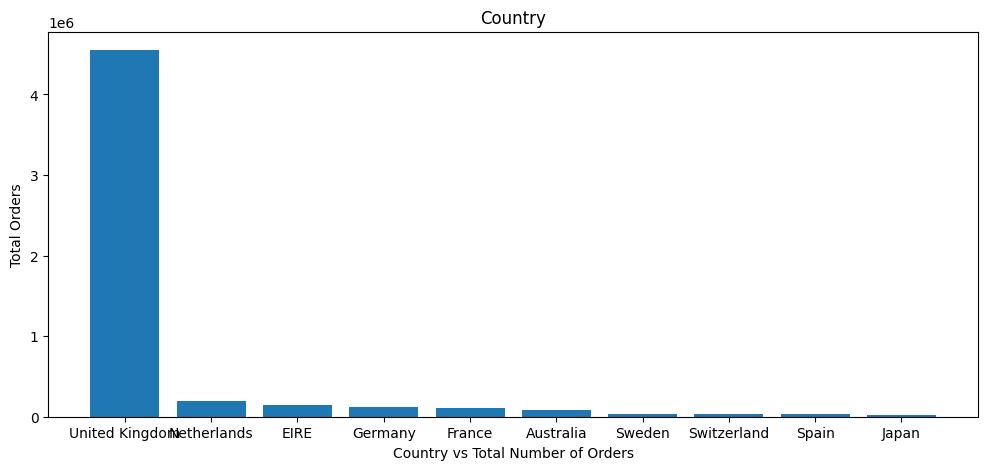

In [1008]:
country_summary = database.groupby(['Country'])['Quantity'].sum().reset_index()
top_10 = country_summary.sort_values(by=['Quantity'],ascending=False)[:10]
plt.figure(figsize = (12,5))
plt.bar(top_10['Country'],top_10['Quantity'], align='center')
plt.title('Country')
plt.xlabel('Country vs Total Number of Orders')
plt.ylabel('Total Orders')
plt.show()

   InvoiceYearMonth      Revenue  MonthlyGrowth
1        2011-01-01   482792.230      -0.340935
2        2011-02-01   428986.620      -0.111447
3        2011-03-01   584810.780       0.363238
4        2011-04-01   475677.631      -0.186613
5        2011-05-01   638104.890       0.341465
6        2011-06-01   618345.530      -0.030966
7        2011-07-01   600919.071      -0.028182
8        2011-08-01   573598.750      -0.045464
9        2011-09-01   895098.642       0.560496
10       2011-10-01   935404.140       0.045029
11       2011-11-01  1319934.070       0.411084


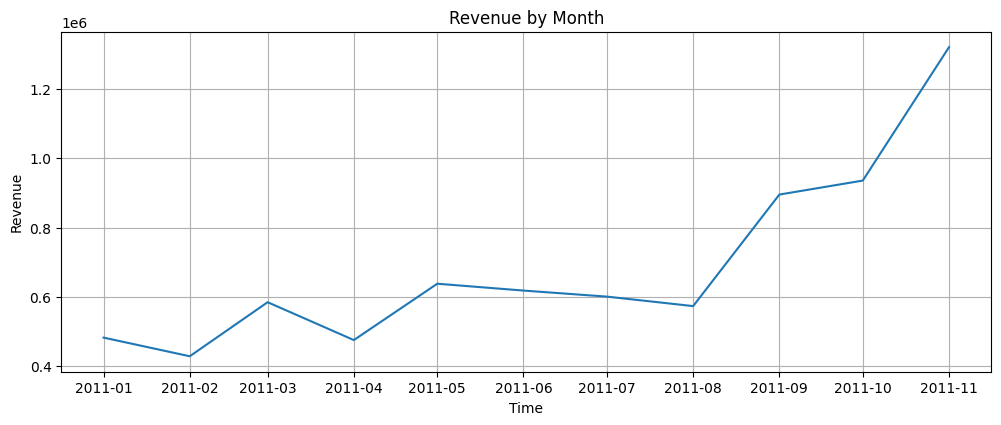

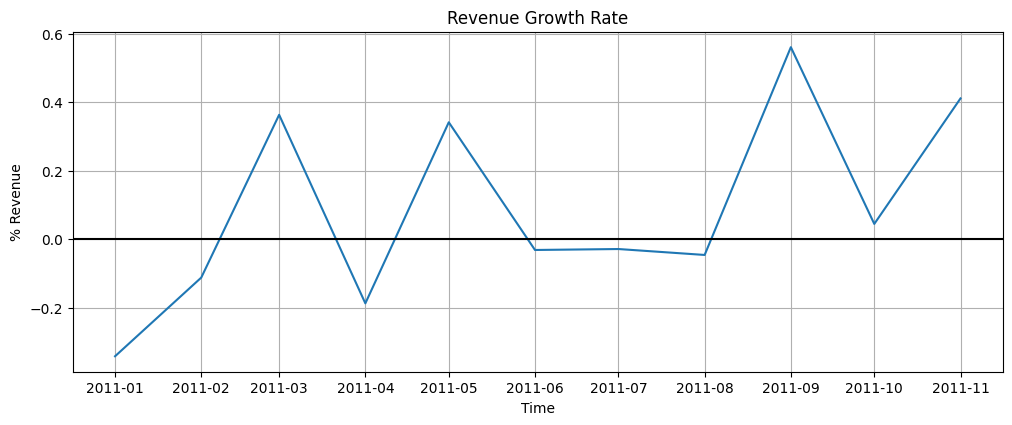

   InvoiceYearMonth  Customer ID
1        2011-01-01          646
2        2011-02-01          679
3        2011-03-01          880
4        2011-04-01          784
5        2011-05-01          962
6        2011-06-01          889
7        2011-07-01          859
8        2011-08-01          834
9        2011-09-01         1146
10       2011-10-01         1230
11       2011-11-01         1505


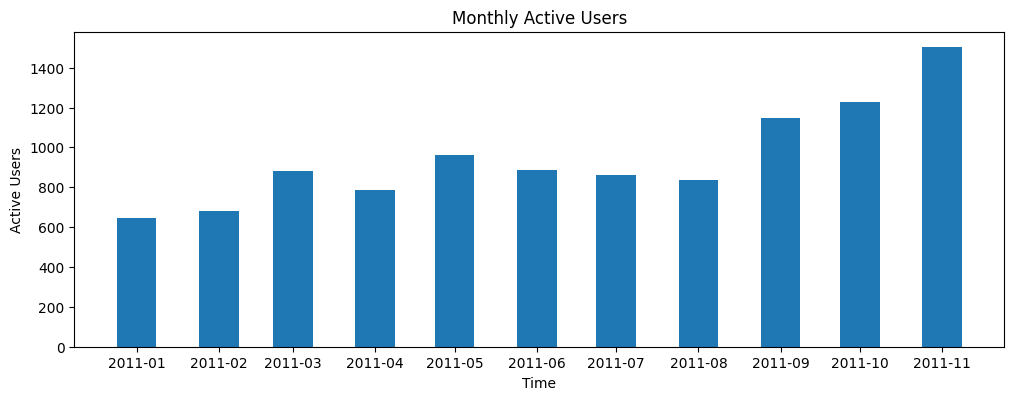

In [1009]:
#Descriptive analysis
# Monthly Revenue
database = database[database['Country'] == 'United Kingdom']

# database.to_csv(Path('/Users/haritharash/sDesktop/warwick/class/Foundation_Data_Analytics/project/clean.csv'),index=False)

database['InvoiceDate'] = pd.to_datetime(database['InvoiceDate'])
database['InvoiceYearMonth'] = database['InvoiceDate'].map(lambda date: 100*date.year + date.month)
database['Revenue'] = database['Quantity'] * database['Price']

monthly_revenue = database.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
monthly_revenue['InvoiceYearMonth'] = pd.to_datetime(monthly_revenue['InvoiceYearMonth'],format = '%Y%m')
monthly_revenue['MonthlyGrowth'] = monthly_revenue['Revenue'].pct_change()
monthly_revenue = monthly_revenue[1:-1]
print(monthly_revenue)

plt.figure(figsize = (12,5))
plt.plot(monthly_revenue['InvoiceYearMonth'],monthly_revenue['Revenue'])
plt.title('Revenue by Month')
plt.xlabel('Time')
# plt.xticks(monthly_revenue['InvoiceYearMonth'],rotation= '45')
plt.ylabel('Revenue')
plt.subplots_adjust(bottom = 0.2) 
plt.grid()
plt.show()

plt.figure(figsize = (12,5))
plt.plot(monthly_revenue['InvoiceYearMonth'],monthly_revenue['MonthlyGrowth'])
plt.title('Revenue Growth Rate')
plt.xlabel('Time')
# plt.xticks(tx_revenue1['InvoiceYearMonth'],rotation= '45')
plt.ylabel('% Revenue')
plt.axhline(y=0, color='k')
plt.subplots_adjust(bottom = 0.2) 
plt.grid()
plt.show()


# Montly Active Customers

monthly_active_customers = database.groupby('InvoiceYearMonth')['Customer ID'].nunique().reset_index()[1:-1]
monthly_active_customers['InvoiceYearMonth'] = pd.to_datetime(monthly_active_customers['InvoiceYearMonth'], format = '%Y%m')
print(monthly_active_customers)
plt.figure(figsize = (12,5))
plt.bar(monthly_active_customers['InvoiceYearMonth'],monthly_active_customers['Customer ID'], width = 15)
# plt.xticks(tx_monthly_active1['InvoiceYearMonth'],rotation= '90')
plt.title('Monthly Active Users')
plt.xlabel('Time')
plt.ylabel('Active Users')
plt.subplots_adjust(bottom = 0.25) 
plt.show()




   InvoiceYearMonth  Quantity
1        2011-01-01    250831
2        2011-02-01    232824
3        2011-03-01    311491
4        2011-04-01    278777
5        2011-05-01    324667
6        2011-06-01    309553
7        2011-07-01    338103
8        2011-08-01    334455
9        2011-09-01    482496
10       2011-10-01    508654
11       2011-11-01    656261


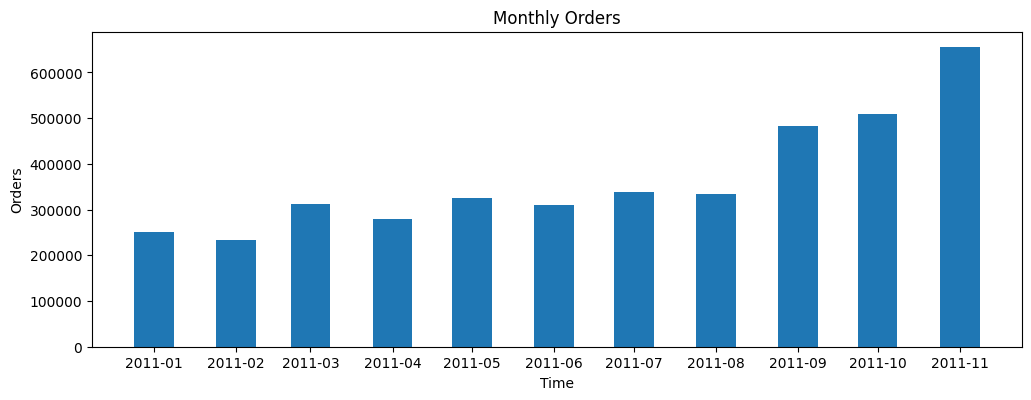

In [1010]:
# Monthly Order Count 

monthly_sales = database.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()[1:-1]
monthly_sales['InvoiceYearMonth'] = pd.to_datetime(monthly_sales['InvoiceYearMonth'], format = '%Y%m')

print(monthly_sales)
plt.figure(figsize = (12,5))
plt.bar(monthly_sales['InvoiceYearMonth'],monthly_sales['Quantity'], width = 15)
# plt.xticks(monthly_sales['InvoiceYearMonth'],rotation= '90')
plt.title('Monthly Orders')
plt.xlabel('Time')
plt.ylabel('Orders')
plt.subplots_adjust(bottom = 0.25) 
plt.show()

   InvoiceYearMonth    Revenue
1        2011-01-01  15.591043
2        2011-02-01  17.362256
3        2011-03-01  18.038581
4        2011-04-01  17.526165
5        2011-05-01  19.490070
6        2011-06-01  19.199104
7        2011-07-01  17.154902
8        2011-08-01  18.908187
9        2011-09-01  20.172146
10       2011-10-01  17.753984
11       2011-11-01  17.309249


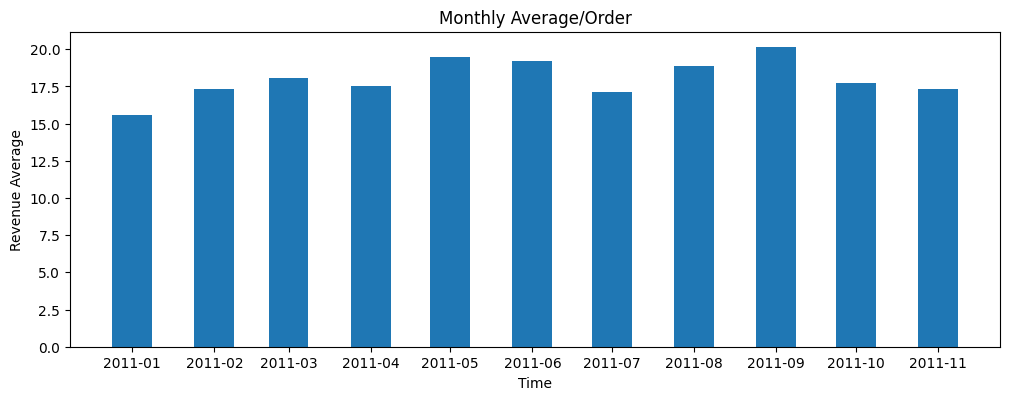

In [1011]:
# Average Revenue per Order

monthly_order_avg = database.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index()[1:-1]
monthly_order_avg['InvoiceYearMonth'] = pd.to_datetime(monthly_order_avg['InvoiceYearMonth'], format = '%Y%m')

print(monthly_order_avg)
plt.figure(figsize = (12,5))
plt.bar(monthly_order_avg['InvoiceYearMonth'],monthly_order_avg['Revenue'], width = 15)

plt.title('Monthly Average/Order')
plt.xlabel('Time')
plt.ylabel('Revenue Average')
plt.subplots_adjust(bottom = 0.25) 
plt.show()


In [1012]:
# New customer ratio
min_purchase = database.groupby('Customer ID').InvoiceDate.min().reset_index()
min_purchase.columns = ['Customer ID','MinPurchaseDate']
min_purchase['MinPurchaseYearMonth'] = min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)
database = pd.merge(database, min_purchase, on='Customer ID')

In [1013]:
database['UserType'] = 'New'
database.loc[database['InvoiceYearMonth']>database['MinPurchaseYearMonth'],'UserType'] = 'Existing'
database.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth,UserType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012,New
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New


   InvoiceYearMonth  UserType     Revenue
1        2011-01-01  Existing  199116.690
2        2011-01-01       New  164576.040
3        2011-02-01  Existing  219000.380
4        2011-02-01       New  135617.820
5        2011-03-01  Existing  295924.110
6        2011-03-01       New  169860.080
7        2011-04-01  Existing  298686.160
8        2011-04-01       New  110046.951
9        2011-05-01  Existing  455665.250
10       2011-05-01       New   94694.100
11       2011-06-01  Existing  416489.520
12       2011-06-01       New  107286.070
13       2011-07-01  Existing  423196.920
14       2011-07-01       New   61348.671
15       2011-08-01  Existing  440660.550
16       2011-08-01       New   56534.360
17       2011-09-01  Existing  657706.151
18       2011-09-01       New  137100.541
19       2011-10-01  Existing  682877.480
20       2011-10-01       New  138342.650
21       2011-11-01  Existing  857715.910
22       2011-11-01       New  117535.480


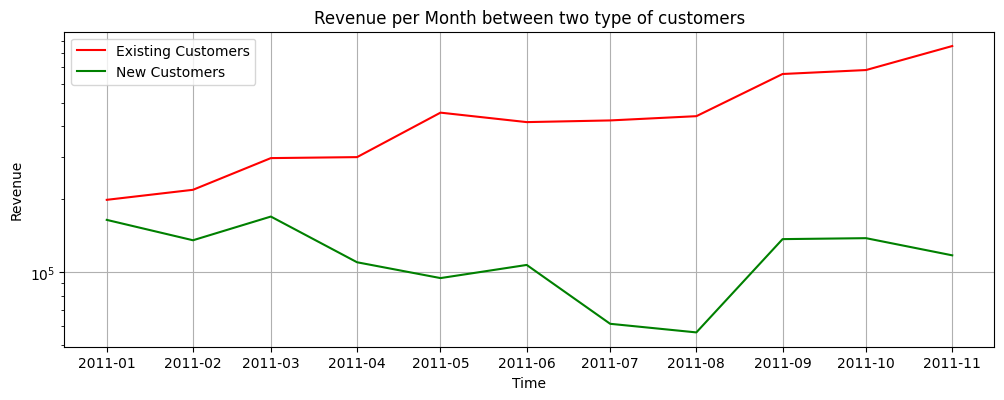

In [1014]:
user_type_revenue = database.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()[1:-2]
user_type_revenue['InvoiceYearMonth'] = pd.to_datetime(user_type_revenue['InvoiceYearMonth'], format = '%Y%m')
#split new user to existing user data
print(user_type_revenue)

existing_user = user_type_revenue[user_type_revenue['UserType'] == 'Existing']
new_user = user_type_revenue[user_type_revenue['UserType'] == 'New']

plt.figure(figsize = (12,5))
plt.plot(existing_user['InvoiceYearMonth'],existing_user['Revenue'], label = 'Existing Customers', color = 'r')
plt.plot(new_user['InvoiceYearMonth'],new_user['Revenue'], label = 'New Customers', color = 'g')
plt.title('Revenue per Month between two type of customers')
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.yscale('log')
plt.axhline(y=0, color='k')
plt.subplots_adjust(bottom = 0.25) 
plt.legend()
plt.grid()
plt.show()

Index([201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108, 201109,
       201110, 201111],
      dtype='object', name='InvoiceYearMonth')


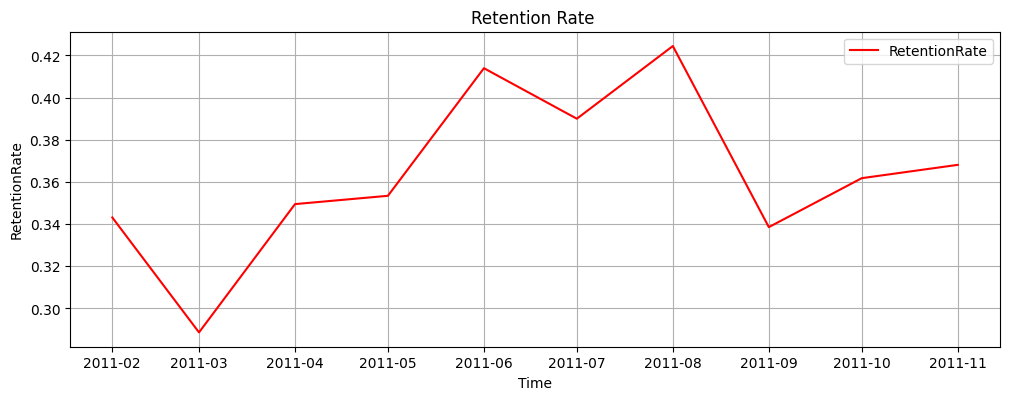

In [1015]:
# Monthly Retentetion Rate
user_purchase = database.groupby(['Customer ID','InvoiceYearMonth'])['Revenue'].sum().reset_index()

tx_retention = pd.crosstab(user_purchase['Customer ID'], user_purchase['InvoiceYearMonth']).reset_index()
months = tx_retention.columns[2:-1]
print(months)
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = tx_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = tx_retention[(tx_retention[selected_month]>0) & (tx_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)

tx_retention = pd.DataFrame(retention_array)
tx_retention['RetentionRate'] = tx_retention['RetainedUserCount']/tx_retention['TotalUserCount']
tx_retention['InvoiceYearMonth'] = pd.to_datetime(tx_retention['InvoiceYearMonth'],format = '%Y%m')
tx_retention

plt.figure(figsize = (12,5))
plt.plot(tx_retention['InvoiceYearMonth'],tx_retention['RetentionRate'], label = 'RetentionRate', color = 'r')
plt.title('Retention Rate ')
plt.xlabel('Time')
plt.ylabel('RetentionRate')
# plt.axhline(y=0, color='k')
plt.subplots_adjust(bottom = 0.25) 
plt.legend()
plt.grid()
plt.show()


In [1016]:
database

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth,UserType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012,New
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349219,581416,22809,SET OF 6 T-LIGHTS SANTA,1,2011-12-08 14:58:00,2.95,14569.0,United Kingdom,201112,2.95,2011-12-08 14:58:00,201112,New
349220,581416,22807,SET OF 6 T-LIGHTS TOADSTOOLS,2,2011-12-08 14:58:00,1.25,14569.0,United Kingdom,201112,2.50,2011-12-08 14:58:00,201112,New
349221,581416,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-12-08 14:58:00,2.10,14569.0,United Kingdom,201112,2.10,2011-12-08 14:58:00,201112,New
349222,581416,22809,SET OF 6 T-LIGHTS SANTA,2,2011-12-08 14:58:00,2.95,14569.0,United Kingdom,201112,5.90,2011-12-08 14:58:00,201112,New


In [1017]:
# Customer Segmentation - clustering 
clean_data = pd.read_csv('/Users/haritharash/Desktop/warwick/class/Foundation_Data_Analytics/project/clean.csv',index_col=False)
clean_data['InvoiceDate'] = pd.to_datetime(clean_data['InvoiceDate'])
clean_data['InvoiceYearMonth'] = clean_data['InvoiceDate'].map(lambda date: 100*date.year + date.month)

users = pd.DataFrame(clean_data['Customer ID'].unique())
users.columns = ['Customer ID']

#get the max purchase date for each customer and create a dataframe with it 
#Recency
max_purchase = clean_data.groupby('Customer ID')['InvoiceDate'].max().reset_index()
max_purchase.columns = ['Customer ID','MaxPurchaseDate']
max_purchase['Recency'] = (max_purchase['MaxPurchaseDate'].max() - max_purchase['MaxPurchaseDate']).dt.days
users = pd.merge(users,max_purchase[['Customer ID','Recency']], on = 'Customer ID')

#frequency
frequency = clean_data.groupby('Customer ID')['InvoiceDate'].count().reset_index()
frequency.columns = ['Customer ID','Frequency']
users = pd.merge(users, frequency, on='Customer ID')

#Revenue
clean_data['Revenue'] = clean_data['Price'] * clean_data['Quantity']
revenue = clean_data.groupby('Customer ID')['Revenue'].sum().reset_index()
users = pd.merge(users, revenue, on='Customer ID')
users.describe()

,Customer ID,Recency,Frequency,Revenue
count,3919.000000,3919.000000,3919.000000,3919.000000
mean,15562.880327,91.201072,89.110487,1796.216240
std,1575.958319,99.482399,214.068204,6885.327829
min,12747.000000,0.000000,1.000000,2.900000
25%,14209.500000,17.000000,17.000000,298.055000
50%,15570.000000,50.000000,40.000000,643.900000
75%,16913.500000,142.000000,98.000000,1567.585000
max,18287.000000,373.000000,7676.000000,259657.300000


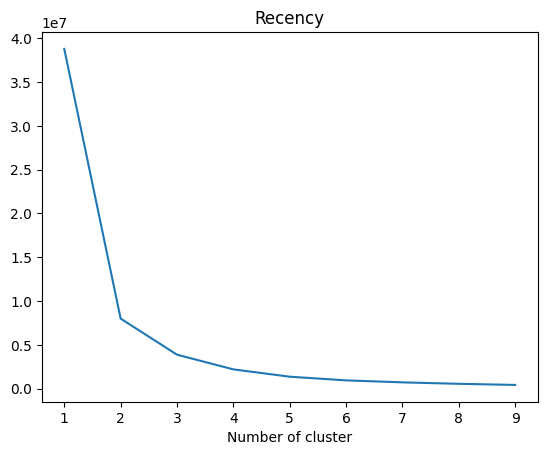

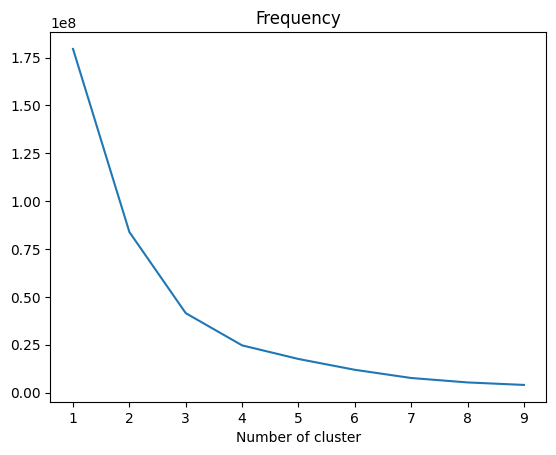

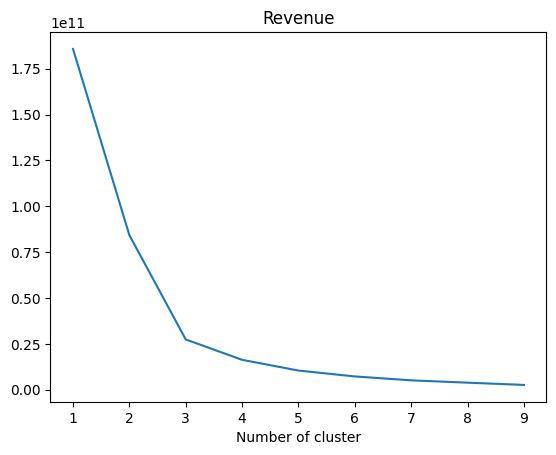

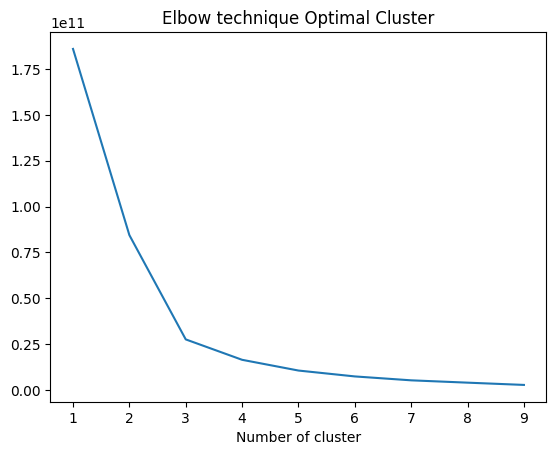

In [1036]:
#Elbow Method for determining number of clusters
from sklearn.cluster import KMeans
sse={}
tx_recency = users[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.title('Recency')
plt.show()

# determining number of cluster
sse={}
tx_frequency = users[['Frequency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_frequency)
    tx_frequency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.title('Frequency')
plt.show()

# determining number of cluster
sse={}
tx_frequency = users[['Revenue']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_frequency)
    tx_frequency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.title('Revenue')
plt.show()

sse={}
tx_frequency = users[['Recency','Frequency','Revenue']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_frequency)
    tx_frequency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.title('Elbow technique Optimal Cluster')
plt.show()

In [1019]:
#build 4 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters=4)
kmeans.fit(users[['Recency']])
users['RecencyCluster'] = kmeans.predict(users[['Recency']])
a = users.groupby('RecencyCluster')['Recency'].describe()


#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

users = order_cluster('RecencyCluster', 'Recency',users,False)

#See the detail for the recency cluster
users.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,441.0,307.095238,39.627298,250.0,272.0,302.0,336.0,373.0
1,551.0,192.451906,31.332367,139.0,168.0,190.0,217.0,249.0
2,891.0,84.542088,23.985978,53.0,64.0,78.0,103.0,138.0
3,2036.0,19.950884,14.923936,0.0,7.0,17.0,30.0,52.0


In [1020]:
#Frequency cluster
kmeans = KMeans(n_clusters=4)
kmeans.fit(users[['Frequency']])
users['FrequencyCluster'] = kmeans.predict(users[['Frequency']])

#order the frequency cluster
users = order_cluster('FrequencyCluster', 'Frequency',users,True)

#see details of each cluster
users.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3466.0,48.241489,43.354537,1.0,15.0,33.0,71.0,183.0
1,428.0,319.754673,130.117216,184.0,218.0,277.0,384.0,785.0
2,22.0,1271.090909,489.487284,828.0,951.0,1100.0,1423.5,2677.0
3,3.0,5733.333333,1718.216032,4413.0,4762.0,5111.0,6393.5,7676.0


In [1021]:
#Revenue cluster
kmeans = KMeans(n_clusters=4)
kmeans.fit(users[['Revenue']])
users['RevenueCluster'] = kmeans.predict(users[['Revenue']])
users = order_cluster('RevenueCluster', 'Revenue',users,True)
users.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,3715.0,998.860440,1049.576789,2.90,284.5050,598.730,1341.2350,5298.48
1,180.0,9669.716389,5134.151793,5343.28,6286.1350,7777.090,10854.1025,28882.44
2,22.0,51545.812273,16002.701995,31833.68,37844.5125,51009.555,60165.0825,91062.38
3,2.0,227024.045000,46150.391805,194390.79,210707.4175,227024.045,243340.6725,259657.30


In [1037]:
users['OverallScore'] = users['RecencyCluster'] + users['FrequencyCluster'] + users['RevenueCluster']

overallsummary = users.groupby('OverallScore')[['Recency','Frequency','Revenue']].mean().reset_index()
#print(overallsummary)

# users['Segment'] = 'Low-Value'
# users.loc[users['OverallScore']>2,'Segment'] = 'Mid-Value' 
# users.loc[users['OverallScore']>4,'Segment'] = 'High-Value'
# churn_data.to_csv(Path('/Users/haritharash/Desktop/warwick/class/Foundation_Data_Analytics/project/churn_rfm.csv'),index=False)


,Customer ID,Recency,Frequency,Revenue,RecencyCluster,FrequencyCluster,RevenueCluster,OverallScore
0,17850.0,371,297,5391.21,0,1,1,2
1,14688.0,7,324,5579.10,3,1,1,5
2,13408.0,1,478,28117.04,3,1,1,5
3,13767.0,1,368,17220.36,3,1,1,5
4,15513.0,32,308,14758.22,3,1,1,5
...,...,...,...,...,...,...,...,...
3914,12748.0,0,4413,33053.19,3,3,2,8
3915,17841.0,1,7676,40519.84,3,3,2,8
3916,14096.0,3,5111,65164.79,3,3,2,8
3917,17450.0,7,336,194390.79,3,1,3,7


In [1038]:
tx_merge = users.query("Revenue < 50000 and Frequency < 2000")
tx_merge.to_csv(Path('/Users/haritharash/Desktop/warwick/class/Foundation_Data_Analytics/project/rfm_latest_now.csv'),index=False)
tx_merge

,Customer ID,Recency,Frequency,Revenue,RecencyCluster,FrequencyCluster,RevenueCluster,OverallScore
0,17850.0,371,297,5391.21,0,1,1,2
1,14688.0,7,324,5579.10,3,1,1,5
2,13408.0,1,478,28117.04,3,1,1,5
3,13767.0,1,368,17220.36,3,1,1,5
4,15513.0,32,308,14758.22,3,1,1,5
...,...,...,...,...,...,...,...,...
3903,16013.0,3,139,37130.60,3,0,2,5
3906,15838.0,10,167,33643.08,3,0,2,5
3907,12931.0,21,82,42055.96,3,0,2,5
3908,15749.0,234,10,44534.30,1,0,2,3


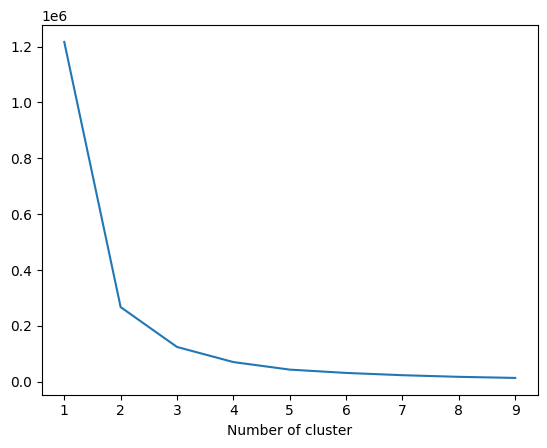

In [1024]:
# Customer Lifetime value Prediction - linear regression


tx_3m = database[(database.InvoiceDate < pd.Timestamp(2011,6,1)) & (database.InvoiceDate >= pd.Timestamp(2011,3,1))].reset_index(drop=True)
tx_6m = database[(database.InvoiceDate >= pd.Timestamp(2011,6,1)) & (database.InvoiceDate < pd.Timestamp(2011,12,1))].reset_index(drop=True)


tx_user = pd.DataFrame(tx_3m['Customer ID'].unique())
tx_user.columns = ['Customer ID']
tx_max_purchase = tx_3m.groupby('Customer ID')['InvoiceDate'].max().reset_index()
tx_max_purchase.columns = ['Customer ID','MaxPurchaseDate']
tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']).dt.days
tx_user = pd.merge(tx_user,tx_max_purchase[['Customer ID','Recency']], on = 'Customer ID')

sse={}
tx_recency = tx_user[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [1039]:
#build 4 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Recency']])
tx_user['RecencyCluster'] = kmeans.predict(tx_user[['Recency']])
a = tx_user.groupby('RecencyCluster')['Recency'].describe()

kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Recency']])
tx_user['RecencyCluster'] = kmeans.predict(tx_user[['Recency']])
a = tx_user.groupby('RecencyCluster')['Recency'].describe()


#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

tx_user = order_cluster('RecencyCluster', 'Recency',tx_user,False)

#See the detail for the recency cluster
tx_user.groupby('RecencyCluster')['Recency'].describe()


tx_frequency = tx_3m.groupby('Customer ID').InvoiceDate.count().reset_index()
tx_frequency.columns = ['Customer ID','Frequency']

#add this data to our main dataframe
tx_user = pd.merge(tx_user, tx_frequency, on='Customer ID')
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Frequency']])
tx_user['FrequencyCluster'] = kmeans.predict(tx_user[['Frequency']])
tx_user = order_cluster('FrequencyCluster', 'Frequency',tx_user,True)
tx_user.groupby('FrequencyCluster')['Frequency'].describe()
tx_3m['Revenue'] = tx_3m['Price'] * tx_3m['Quantity']
tx_revenue = tx_3m.groupby('Customer ID')['Revenue'].sum().reset_index()
tx_user = pd.merge(tx_user, tx_revenue, on='Customer ID')
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Revenue']])
tx_user['RevenueCluster'] = kmeans.predict(tx_user[['Revenue']])

tx_user = order_cluster('RevenueCluster', 'Revenue',tx_user,True)

tx_user.groupby('RevenueCluster')['Revenue'].describe()

tx_user['OverallScore'] = tx_user['RecencyCluster'] + tx_user['FrequencyCluster'] + tx_user['RevenueCluster']

overallsummary = tx_user.groupby('OverallScore')[['Recency','Frequency','Revenue']].mean().reset_index()
tx_user['Segment'] = 'Low-Value'
tx_user.loc[tx_user['OverallScore']>2,'Segment'] = 'Mid-Value' 
tx_user.loc[tx_user['OverallScore']>4,'Segment'] = 'High-Value' 
tx_user.describe()

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore
count,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000
mean,15535.490066,35.744481,1.687086,38.259934,0.139073,786.355768,0.059603,1.885762
std,1578.518683,25.919242,1.105575,59.251947,0.367775,1782.723867,0.275608,1.336187
min,12747.000000,0.000000,0.000000,1.000000,0.000000,2.900000,0.000000,0.000000
25%,14197.250000,13.000000,1.000000,12.000000,0.000000,218.017500,0.000000,1.000000
50%,15554.500000,27.000000,2.000000,23.000000,0.000000,379.355000,0.000000,2.000000
75%,16847.000000,56.000000,3.000000,46.000000,0.000000,778.112500,0.000000,3.000000
max,18287.000000,91.000000,3.000000,1313.000000,3.000000,35111.220000,3.000000,7.000000


In [1040]:
tx_6m['Revenue'] = tx_6m['Price'] * tx_6m['Quantity']
tx_user_6m = tx_6m.groupby('Customer ID')['Revenue'].sum().reset_index()
tx_user_6m.columns = ['Customer ID','m6_Revenue']

tx_merge = pd.merge(tx_user, tx_user_6m, on=['Customer ID'], how='left')
tx_merge = tx_merge.fillna(0)

xlow=tx_merge.query("Segment == 'Low-Value'")['OverallScore']
ylow=tx_merge.query("Segment == 'Low-Value'")['m6_Revenue']

xmid=tx_merge.query("Segment == 'Mid-Value'")['OverallScore']
ymid=tx_merge.query("Segment == 'Mid-Value'")['m6_Revenue']

xhigh=tx_merge.query("Segment == 'High-Value'")['OverallScore']
yhigh=tx_merge.query("Segment == 'High-Value'")['m6_Revenue']

tx_merge

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment,m6_Revenue
0,13047.0,27,2,39,0,846.15,0,2,Low-Value,1565.86
1,17809.0,25,2,3,0,789.00,0,2,Low-Value,2761.21
2,13448.0,26,2,37,0,593.72,0,2,Low-Value,2111.43
3,14307.0,27,2,28,0,424.42,0,2,Low-Value,1300.74
4,14849.0,21,2,57,0,984.88,0,2,Low-Value,5517.63
...,...,...,...,...,...,...,...,...,...,...
1807,14298.0,27,2,433,2,14984.73,2,6,High-Value,24081.07
1808,15311.0,4,3,495,2,16692.66,2,7,High-Value,29904.94
1809,13089.0,7,3,434,2,12318.57,2,7,High-Value,26204.27
1810,17450.0,0,3,45,0,35111.22,3,6,High-Value,137068.13


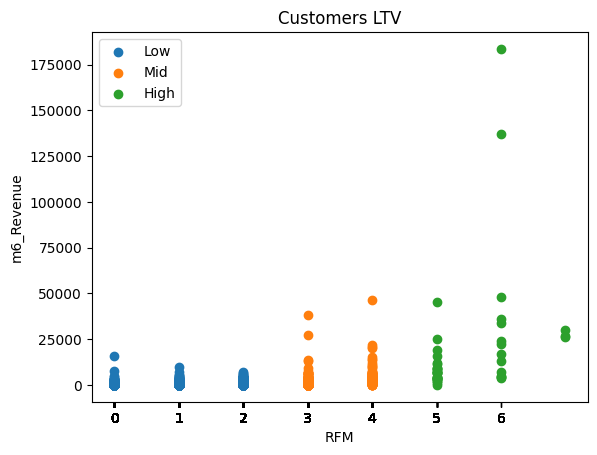

In [1042]:
plt.scatter(xlow,ylow, label = 'Low')
plt.scatter(xmid,ymid, label = 'Mid')
plt.scatter(xhigh,yhigh, label = 'High')
plt.title('Customers LTV')
plt.xlabel('RFM')
plt.xticks(tx_merge['OverallScore'])
plt.ylabel('m6_Revenue')
plt.legend()
plt.show()

In [1049]:
tx_merge = tx_merge[tx_merge['m6_Revenue']<tx_merge['m6_Revenue'].quantile(0.99)]


#creating 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(tx_merge[['m6_Revenue']])
tx_merge['LTVCluster'] = kmeans.predict(tx_merge[['m6_Revenue']])

#order cluster number based on LTV
tx_merge = order_cluster('LTVCluster', 'm6_Revenue',tx_merge,True)

#creatinga new cluster dataframe
tx_cluster = tx_merge.copy()

#see details of the clusters
tx_cluster.groupby('LTVCluster')['m6_Revenue'].describe()
tx_class = pd.get_dummies(tx_cluster)
tx_class
# tx_class.to_csv(Path('/Users/haritharash/Desktop/warwick/class/Foundation_Data_Analytics/project/clvt_latest_fri.csv'),index=False)

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,m6_Revenue,LTVCluster,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value
0,13047.0,27,2,39,0,846.150,0,2,1565.86,1,0,1,0
1,17069.0,34,2,29,0,489.870,0,2,1636.63,1,0,1,0
2,15544.0,18,2,40,0,560.350,0,2,1787.24,1,0,1,0
3,14099.0,25,2,51,0,502.730,0,2,1782.71,1,0,1,0
4,13784.0,26,2,9,0,442.830,0,2,1690.32,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,13135.0,4,3,1,0,3096.000,1,4,0.00,0,0,0,1
1664,15032.0,64,0,22,0,2188.500,1,1,0.00,0,0,1,0
1665,13952.0,25,2,137,1,3251.071,1,4,0.00,0,0,0,1
1666,17504.0,14,3,91,1,2209.600,1,5,0.00,0,1,0,0


   OverallScore     Recency    Frequency       Revenue
0             0   29.543032    53.661299   1176.983733
1             1   97.834286   109.737143   1722.263763
2             2  225.419244    46.690722   1253.638952
3             3   27.875000  1716.625000  75873.496250


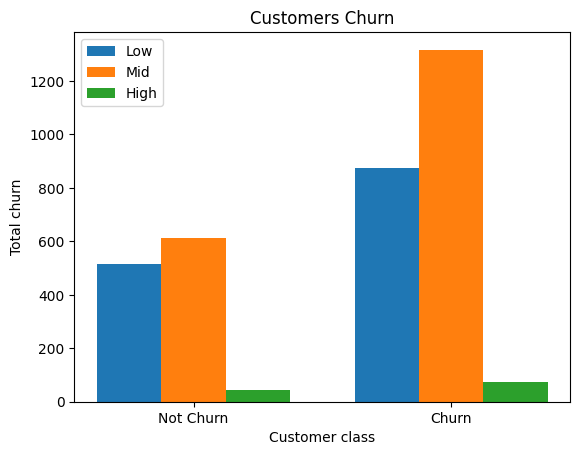

In [1029]:
# Churn prediction - naive bayes
#get the max purchase date for each customer and create a dataframe with it 
data_6m = database[(database.InvoiceDate < pd.Timestamp(2011,11,1)) & (database.InvoiceDate >= pd.Timestamp(2011,1,1))].reset_index(drop=True)
data_3m = database[(database.InvoiceDate >= pd.Timestamp(2011,11,1)) & (database.InvoiceDate < pd.Timestamp(2011,12,1))].reset_index(drop=True)
tx_max_purchase = data_6m.groupby('Customer ID')['InvoiceDate'].max().reset_index()
tx_max_purchase.columns = ['Customer ID','MaxPurchaseYearMonth']

# #get the min purchase date for each customer and create a dataframe with it 
tx_min_purchase = data_3m.groupby('Customer ID')['InvoiceDate'].min().reset_index()
tx_min_purchase.columns = ['Customer ID','MinPurchaseYearMonth']

# tx_max_purchase['Tenure'] = (tx_max_purchase['MaxPurchaseYearMonth'] - tx_min_purchase['MinPurchaseYearMonth']).dt.days

# test = pd.merge(users,tx_max_purchase[['Customer ID','Tenure']])


tx_max_purchase.loc[tx_max_purchase['Customer ID'].isin(tx_min_purchase['Customer ID']), 'flag'] = 0
tx_max_purchase['flag'][tx_max_purchase['flag'] != 0] = 1



tx_max_purchase.groupby('flag')['Customer ID'].count().reset_index().describe()
max_purchase = data_6m.groupby('Customer ID')['InvoiceDate'].max().reset_index()
max_purchase.columns = ['Customer ID','MaxPurchaseDate']
# KNN 3
max_purchase['Recency'] = (max_purchase['MaxPurchaseDate'].max() - max_purchase['MaxPurchaseDate']).dt.days
churn_data = pd.merge(tx_max_purchase,max_purchase[['Customer ID','Recency']], on = 'Customer ID')

#frequency 3 or 4
frequency = data_6m.groupby('Customer ID')['InvoiceDate'].count().reset_index()
frequency.columns = ['Customer ID','Frequency']
churn_data = pd.merge(churn_data, frequency, on='Customer ID')

#Revenue 3 or 4
revenue = data_6m.groupby('Customer ID')['Revenue'].sum().reset_index()
churn_data = pd.merge(churn_data, revenue, on='Customer ID')
churn_data = churn_data.drop('MaxPurchaseYearMonth', axis=1)


kmeans = KMeans(n_clusters=3)
kmeans.fit(churn_data[['Recency']])
churn_data['RecencyCluster'] = kmeans.predict(churn_data[['Recency']])
churn_data = order_cluster('RecencyCluster', 'Recency',churn_data,True)

kmeans = KMeans(n_clusters=3)
kmeans.fit(churn_data[['Frequency']])
churn_data['FrequencyCluster'] = kmeans.predict(churn_data[['Frequency']])
churn_data = order_cluster('FrequencyCluster', 'Frequency',churn_data,True)

kmeans = KMeans(n_clusters=3)
kmeans.fit(churn_data[['Revenue']])
churn_data['RevenueCluster'] = kmeans.predict(churn_data[['Revenue']])
churn_data = order_cluster('RevenueCluster', 'Revenue',churn_data,True)

churn_data['OverallScore'] = churn_data['RecencyCluster'] + churn_data['FrequencyCluster'] + churn_data['RevenueCluster']

overallsummary = churn_data.groupby('OverallScore')[['Recency','Frequency','Revenue']].mean().reset_index()


churn_data['Segment'] = 'Low-Value'
churn_data.loc[users['OverallScore']>2,'Segment'] = 'Mid-Value' 
churn_data.loc[users['OverallScore']>4,'Segment'] = 'High-Value' 
# churn_data.to_csv(Path('/Users/haritharash/Desktop/warwick/class/Foundation_Data_Analytics/project/churn_rfm.csv'),index=False)


summary = churn_data.groupby(['flag','Segment']).size().reset_index()
summary.columns = ['Churn','Segment','Size']
print(overallsummary)

# churn_summary = churn_data.groupby(['OverallScore','flag']).size().reset_index()
# churn_summary.columns = ['OverallScore','Churn','Size']
# not_churn = churn_summary[churn_summary['Churn'] == 0]
# churn =  churn_summary[churn_summary['Churn'] == 1]

# plt.bar(churn['OverallScore'],churn['Size'],0.4, label = 'churn')
# plt.bar(not_churn['OverallScore'],not_churn['Size'],0.4, label = 'not churn')
xlow=summary.query("Segment == 'Low-Value'")['Churn']
ylow=summary.query("Segment == 'Low-Value'")['Size']

xmid=summary.query("Segment == 'Mid-Value'")['Churn']
ymid=summary.query("Segment == 'Mid-Value'")['Size']

xhigh=summary.query("Segment == 'High-Value'")['Churn']
yhigh=summary.query("Segment == 'High-Value'")['Size']

plt.bar(xlow,ylow,0.25, label = 'Low')
plt.bar(xmid+0.25,ymid,0.25, label = 'Mid')
plt.bar(xhigh + 0.5,yhigh,0.25, label = 'High')
plt.title('Customers Churn')
plt.xlabel('Customer class')
plt.xticks([0.25,1.25],['Not Churn', 'Churn'])
plt.ylabel('Total churn')
plt.legend()
plt.show()